In [41]:
import pandas as pd

data = pd.read_csv("/content/ransomware_synthetic_behavior_dataset.csv", sep=",") #Read Dataframe

print(data)



    family write_rate rename_count crypto_calls processes registry_ops  \
0    Locky        187           61          297         5           11   
1    Locky        174           66          324         5           11   
2    Locky        189           62          298         6           12   
3    Locky        212           74          320         6           10   
4    Locky        180           52          322         5           12   
..     ...        ...          ...          ...       ...          ...   
983  REvil        245           93          399         8           15   
984  REvil        237           89          383         7           13   
985  REvil        248           96          405         9           15   
986  REvil        241           92          394         8           14   
987  REvil        236           90          387         7           14   

    network_out  
0             3  
1             3  
2             2  
3             3  
4             4  
.. 

In [42]:
data = data[data.ne(data.columns).any(axis=1)]

In [43]:
"""
data.describe() shows us the mean/median (50% row)/std/min/max of each column

"""
data.describe() #Summarize data for columns

,family,write_rate,rename_count,crypto_calls,processes,registry_ops,network_out
count,987,987,987,987,987,987,987
unique,4,122,70,192,7,12,6
top,Ryuk,243,90,421,8,15,4
freq,250,20,39,14,222,145,400


In [44]:
"""
create dataframe
checking for duplicate values
NO DUPLICATES
"""
df = pd.DataFrame(data) #Build a dataframe from csv
duplicates = df.duplicated(keep=False) #Find duplicated
print(df[duplicates]) #Get duplicated rows


    family write_rate rename_count crypto_calls processes registry_ops  \
212  Locky        188           66          310         6           12   
244  Locky        188           66          310         6           12   
497   Ryuk        269          108          445         9           17   
551   Ryuk        269          108          445         9           17   
686   Ryuk        272          104          431         9           17   
712   Ryuk        269          103          428         9           17   
727   Ryuk        272          104          431         9           17   
729   Ryuk        269          103          428         9           17   
932  REvil        238           89          385         7           14   
947  REvil        250           99          408         9           16   
949  REvil        245           93          399         8           15   
977  REvil        238           89          385         7           14   
981  REvil        250           99    

In [45]:
"""
checking for null values
"""

missing = df.isnull().sum() #Find what columns have missing values
print(missing) #Print columns that contain missing values

family          0
write_rate      0
rename_count    0
crypto_calls    0
processes       0
registry_ops    0
network_out     0
dtype: int64


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


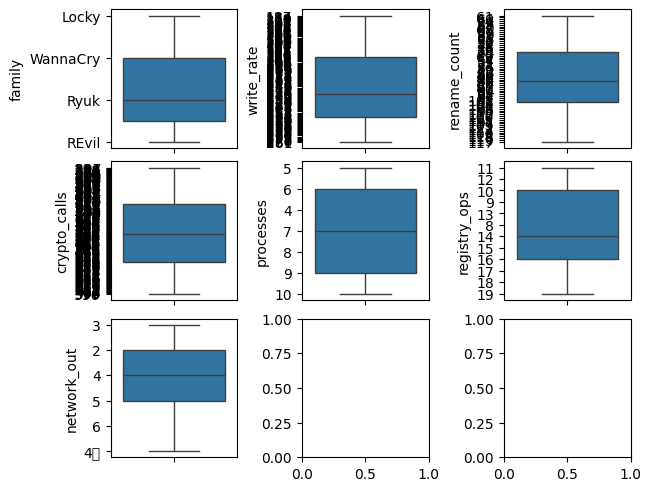

In [46]:
"""
box plots to check for outliers
"""
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6)) #Set Size
fig, axs = plt.subplots(nrows=3,ncols=3, constrained_layout=True) #Create subplots

for ax, i in zip(axs.ravel(), df.columns[0:]): #Create box plots for each column
    box = sns.boxplot(data=df[i],ax=ax)
plt.show()

In [47]:
"""
TRANSFORMATIONS OCCUR HERE

RERUN THIS CELL TO RESET DATAFRAME IF TRANSFORMATION IS INCORRECT
"""


data = data[data.ne(data.columns).any(axis=1)] #Because the columns were repeated for some reason
df = pd.DataFrame(data) #Build a dataframe from csv

In [48]:
df.describe()

,family,write_rate,rename_count,crypto_calls,processes,registry_ops,network_out
count,987,987,987,987,987,987,987
unique,4,122,70,192,7,12,6
top,Ryuk,243,90,421,8,15,4
freq,250,20,39,14,222,145,400


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [50]:
"""
Target column separation
"""
target = 'family'
x = df.drop('family', axis=1)
y = df['family']
print(y)

0      Locky
1      Locky
2      Locky
3      Locky
4      Locky
       ...  
983    REvil
984    REvil
985    REvil
986    REvil
987    REvil
Name: family, Length: 987, dtype: object


In [51]:
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=None, test_size=0.2, random_state = 42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Y_TRAIN BEFORE")
print(y_train)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print("Y_TRAIN AFTER")
print(y_train)


Y_TRAIN BEFORE
757       REvil
717        Ryuk
49        Locky
719        Ryuk
372    WannaCry
         ...   
106       Locky
271    WannaCry
861       REvil
436    WannaCry
102       Locky
Name: family, Length: 789, dtype: object
Y_TRAIN AFTER
0         REvil
1          Ryuk
2         Locky
3          Ryuk
4      WannaCry
         ...   
803    WannaCry
804    WannaCry
805    WannaCry
806    WannaCry
807    WannaCry
Name: family, Length: 808, dtype: object


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [33]:
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#Check class balance is equal
print("Class counts after SMOTE:", Counter(y_train))


classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


grid_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    n_iter=100,
    cv=cv,
    verbose=3,
    n_jobs=-1,
    scoring="f1_macro",
    error_score="raise"
)


grid_search.fit(X_train, y_train)


random_forest = grid_search.best_estimator_

Class counts after SMOTE: Counter({'Ryuk': 200, 'REvil': 200, 'WannaCry': 200, 'Locky': 200})
Fitting 4 folds for each of 100 candidates, totalling 400 fits


In [34]:
from sklearn.metrics import f1_score, classification_report


best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


best_score = grid_search.best_score_
print("Best CV mean F1 macro:", best_score)

y_pred = random_forest.predict(X_test)


test_f1 = f1_score(y_test, y_pred, average="macro")
print("Test F1 macro:", test_f1)

# Full classification report
print(classification_report(y_test, y_pred))


#Note that we might be overtuning, look at how our CV mean F1 is so high (aka how its scoring when testing itself on its training data)
#but when we use the testing data thats completely separate, it's score drops down to 66%

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best CV mean F1 macro: 0.9154971962958373
Test F1 macro: 0.929786793112301
              precision    recall  f1-score   support

       Locky       0.98      1.00      0.99        49
       REvil       0.86      0.88      0.87        50
        Ryuk       0.90      0.88      0.89        50
    WannaCry       0.98      0.96      0.97        49

    accuracy                           0.93       198
   macro avg       0.93      0.93      0.93       198
weighted avg       0.93      0.93      0.93       198



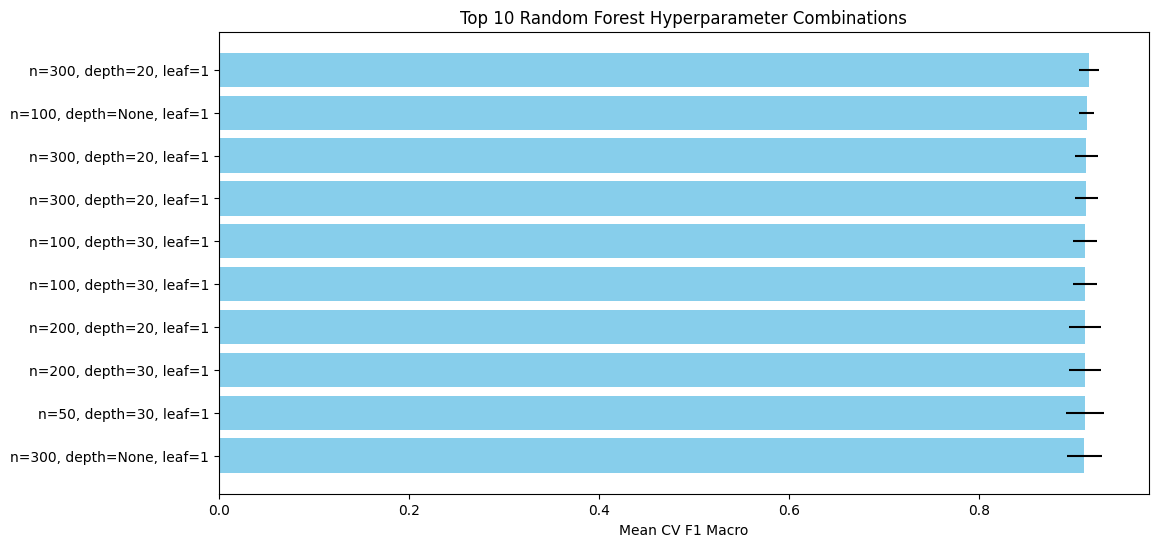

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


results = pd.DataFrame(grid_search.cv_results_)

#Top 10 models
top_results = results.sort_values('mean_test_score', ascending=False).head(10)

plt.figure(figsize=(12,6))

plt.barh(range(len(top_results)), top_results['mean_test_score'],
         xerr=top_results['std_test_score'], color='skyblue')

plt.yticks(range(len(top_results)),
           [f"n={p['n_estimators']}, depth={p['max_depth']}, leaf={p['min_samples_leaf']}"
            for p in top_results['params']])

plt.gca().invert_yaxis()
plt.xlabel('Mean CV F1 Macro')
plt.title('Top 10 Random Forest Hyperparameter Combinations')
plt.show()

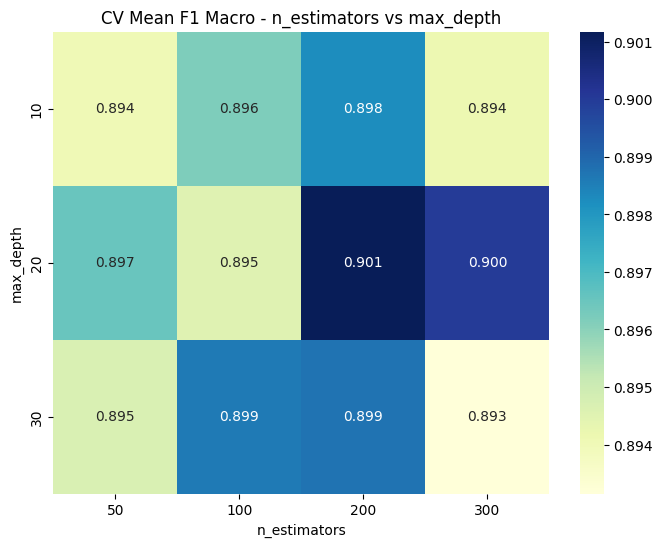

In [36]:
import seaborn as sns

heatmap_data = results.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")

plt.title("CV Mean F1 Macro - n_estimators vs max_depth")
plt.ylabel("max_depth")
plt.xlabel("n_estimators")
plt.show()

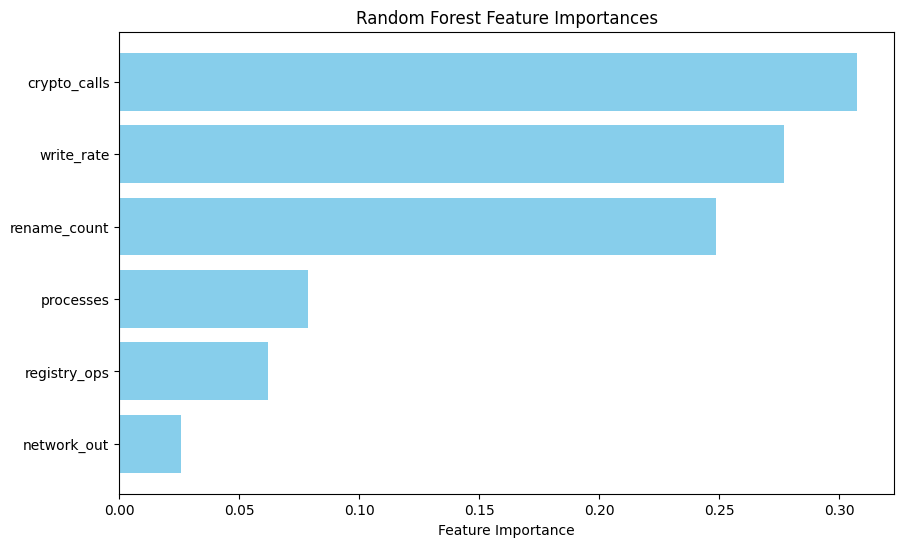

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

#FEATURE IMPORTANCE
importances = random_forest.feature_importances_


feature_names = x.columns if hasattr(x, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]


feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(feat_importances['feature'], feat_importances['importance'], color='skyblue')

plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

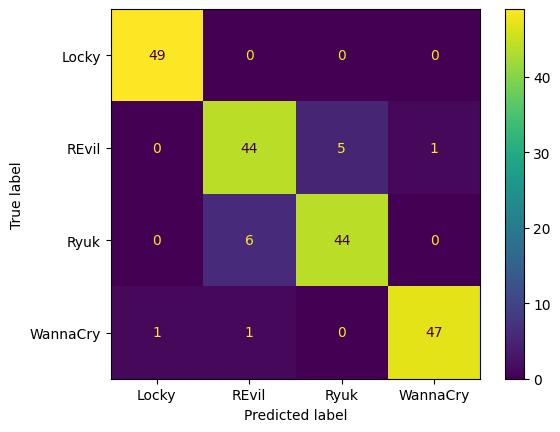

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
class_names = disp.display_labels


In [39]:
import joblib

#Save model
joblib.dump(random_forest, "random_forest_newmodel.pkl")

['random_forest_newmodel.pkl']

In [40]:
joblib.dump(scaler, "newscaler.pkl")

['newscaler.pkl']